In [ ]:
# Importing Dictionaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Importing Dataset

df = pd.read_csv("/content/Dry_Bean.csv")

df.head(10)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   
6  30477    670.033       211.050155       184.039050      1.146768   
7  30519    629.727       212.996755       182.737204      1.165591   
8  30685    635.681       213.534145       183.157146      1.165852   
9  30834    631.934       217.227813       180.897469      1.200834   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6      0.489478       30970     196.988633  0.762402  0.984081   0.853080   
7      0.513760       30847     197.124320  0.770682  0.989367   0.967109   
8      0.514081       31044     197.659696  0.771561  0.988436   0.954240   
9      0.553642       31120     198.139012  0.783683  0.990810   0.970278   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER  
5     0.923726      0.007020      0.003153      0.853270      0.999236  SEKER  
6     0.933374      0.006925      0.003242      0.871186      0.999049  SEKER  
7     0.925480      0.006979      0.003158      0.856514      0.998345  SEKER  
8     0.925658      0.006959      0.003152      0.856844      0.998953  SEKER  
9     0.912125      0.007045      0.003008      0.831973      0.999061  SEKER

In [ ]:
print("The columns are " , df.columns) # Printing the columns of the dataset

The columns are  Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [ ]:
print("The shape is " , df.shape) # Printing the shape of the datastet

The shape is  (13611, 17)


In [ ]:
df.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
df.isnull().sum() # Number of Null Values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
df.duplicated().sum() # Number of duplicated values

68

In [ ]:
df.drop_duplicates(inplace = True) # Dropping Duplicated Values

In [ ]:
df.describe().T  #Statistical Analysis

count          mean           std           min  \
Area             13543.0  53048.460385  29392.438324  20420.000000   
Perimeter        13543.0    854.993406    214.722684    524.736000   
MajorAxisLength  13543.0    319.895602     85.809260    183.601165   
MinorAxisLength  13543.0    202.365321     45.051632    122.512653   
AspectRation     13543.0      1.581075      0.245245      1.024868   
Eccentricity     13543.0      0.750315      0.091858      0.218951   
ConvexArea       13543.0  53767.986709  29844.248525  20684.000000   
EquivDiameter    13543.0    253.034094     59.307709    161.243764   
Extent           13543.0      0.749829      0.048939      0.555315   
Solidity         13543.0      0.987152      0.004650      0.919246   
roundness        13543.0      0.873671      0.059393      0.489618   
Compactness      13543.0      0.800352      0.061464      0.640577   
ShapeFactor1     13543.0      0.006561      0.001130      0.002778   
ShapeFactor2     13543.0      0.001719      0.000595      0.000564   
ShapeFactor3     13543.0      0.644341      0.098653      0.410339   
ShapeFactor4     13543.0      0.995078      0.004347      0.947687   

                          25%           50%           75%            max  
Area             36282.500000  44580.000000  61382.000000  254616.000000  
Perimeter          703.230000    793.896000    977.146500    1985.370000  
MajorAxisLength    253.086806    296.404589    376.312489     738.860154  
MinorAxisLength    175.886357    192.491117    217.245403     460.198497  
AspectRation         1.430662      1.549860      1.703916       2.430306  
Eccentricity         0.715144      0.763997      0.809671       0.911423  
ConvexArea       36673.000000  45122.000000  62360.000000  263261.000000  
EquivDiameter      214.933277    238.245711    279.560351     569.374358  
Extent               0.718735      0.759903      0.786849       0.866195  
Solidity             0.985678      0.988288      0.990019       0.994677  
roundness            0.833410      0.883490      0.917031       0.990685  
Compactness          0.763228      0.801514      0.834470       0.987303  
ShapeFactor1         0.005893      0.006643      0.007270       0.010451  
ShapeFactor2         0.001158      0.001700      0.002173       0.003665  
ShapeFactor3         0.582517      0.642424      0.696341       0.974767  
ShapeFactor4         0.993720      0.996393      0.997891       0.999733

In [ ]:
df.groupby("Class").agg("mean") # Statistical Analysis on the basis of Dry Bean Type

Area    Perimeter  MajorAxisLength  MinorAxisLength  \
Class                                                                    
BARBUNYA   69804.133132  1046.105764       370.044279       240.309352   
BOMBAY    173485.059387  1585.619079       593.152075       374.352547   
CALI       75538.211043  1057.634282       409.499538       236.370616   
DERMASON   32118.710942   665.209536       246.557279       165.657143   
HOROZ      53671.732796   920.108600       372.693927       184.197789   
SEKER      39881.299951   727.672440       251.291957       201.909653   
SIRA       44729.128604   796.418737       299.380258       190.800250   

          AspectRation  Eccentricity     ConvexArea  EquivDiameter    Extent  \
Class                                                                          
BARBUNYA      1.544395      0.754665   71025.729198     297.311018  0.749273   
BOMBAY        1.585550      0.770518  175813.116858     468.941426  0.776559   
CALI          1.733663      0.814804   76688.503067     309.535280  0.758953   
DERMASON      1.490471      0.736632   32498.435138     201.683813  0.752953   
HOROZ         2.026532      0.867482   54463.101075     260.791645  0.705512   
SEKER         1.245182      0.584781   40269.567341     224.948441  0.771674   
SIRA          1.570083      0.767277   45273.099772     238.335316  0.749445   

          Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  \
Class                                                                    
BARBUNYA  0.982804   0.800200     0.805001      0.005357      0.001394   
BOMBAY    0.986902   0.864421     0.792622      0.003442      0.000844   
CALI      0.985021   0.845934     0.756703      0.005459      0.001107   
DERMASON  0.988226   0.908114     0.819110      0.007755      0.002161   
HOROZ     0.985486   0.794374     0.700818      0.007005      0.001047   
SEKER     0.990351   0.944508     0.896841      0.006334      0.002541   
SIRA      0.987971   0.884652     0.797345      0.006720      0.001683   

          ShapeFactor3  ShapeFactor4  
Class                                 
BARBUNYA      0.649144      0.995739  
BOMBAY        0.629195      0.991841  
CALI          0.573022      0.990584  
DERMASON      0.671636      0.996914  
HOROZ         0.491708      0.991922  
SEKER         0.805149      0.998383  
SIRA          0.636358      0.995385

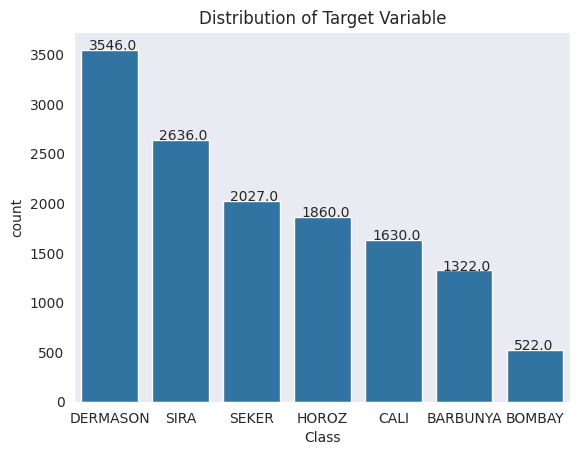

In [ ]:
# Value Counts of target feature

plt.figure()
ax = sns.countplot(x='Class', order=df['Class'].value_counts().index, data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.20))
plt.title("Distribution of Target Variable")
plt.show()

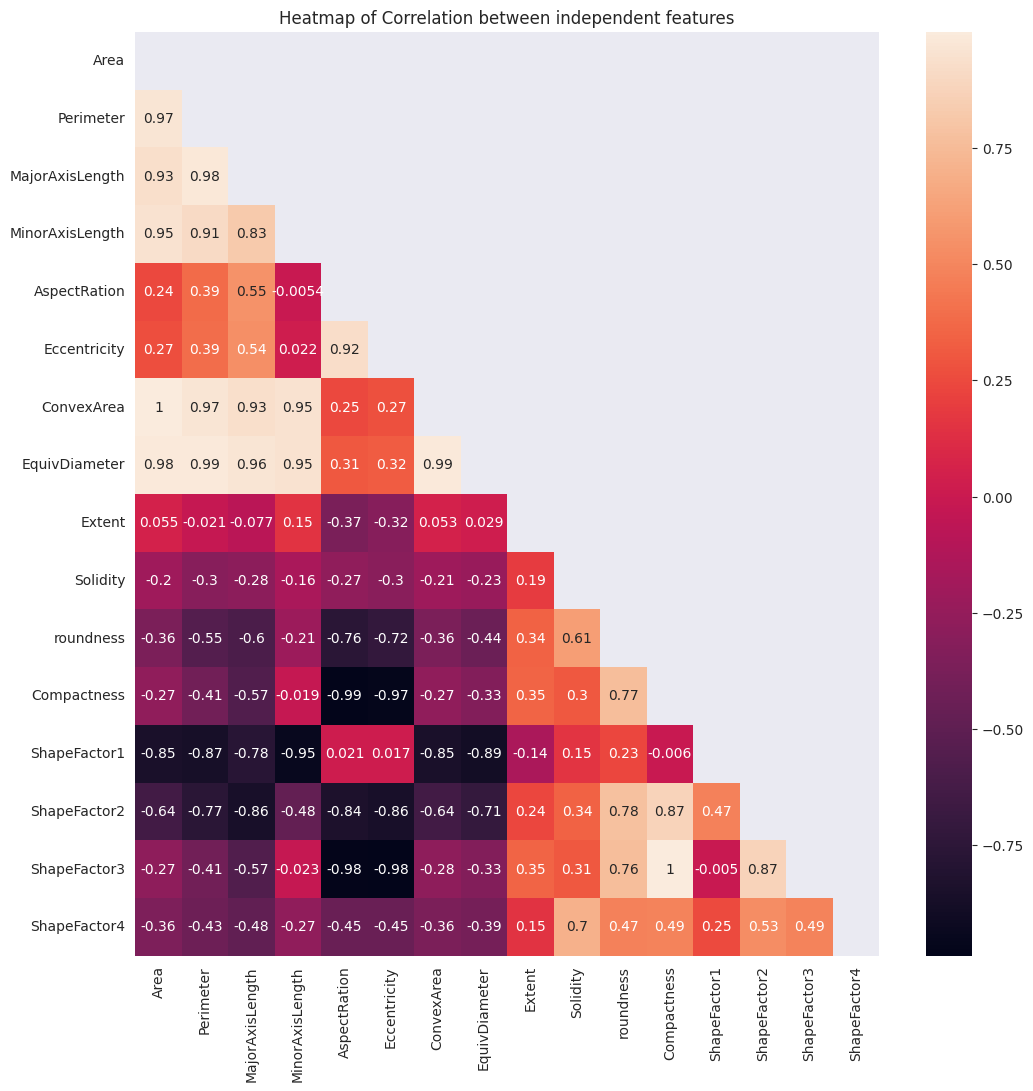

In [ ]:
mask = np.triu(np.ones_like((df.drop("Class" , axis = 1)).corr()))

plt.figure(figsize = (12,12))
sns.heatmap((df.drop("Class" , axis = 1)).corr() , annot = True , mask = mask)
plt.title("Heatmap of Correlation between independent features")
plt.show()

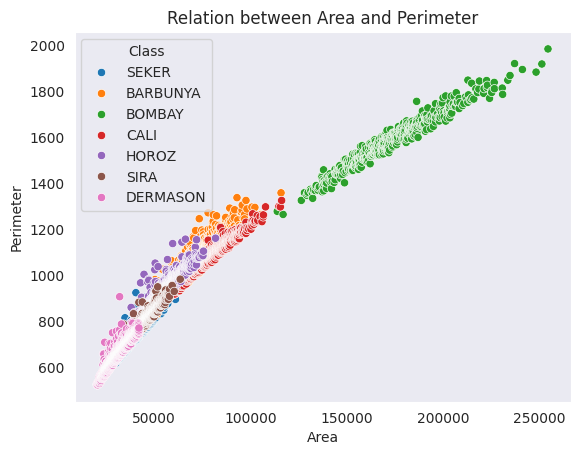

In [ ]:
# Checking Correlations observed and dropping independent features with high linear correlation

plt.figure()
sns.scatterplot(data = df , x = "Area" , y = "Perimeter" , hue = "Class")
plt.title("Relation between Area and Perimeter")
plt.show()

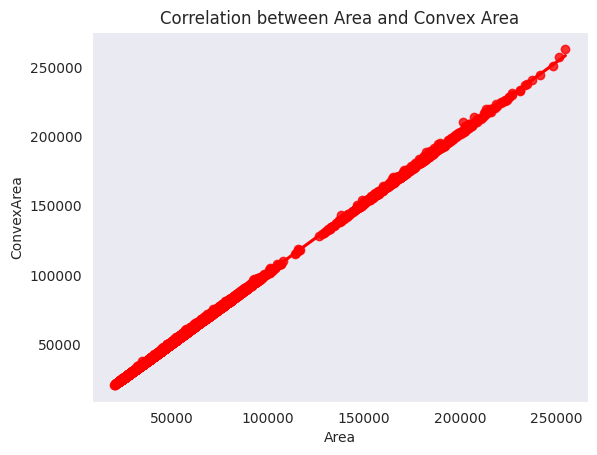

In [ ]:
plt.figure()
sns.regplot(data = df , x = "Area" , y = "ConvexArea" , color = "r")
plt.title("Correlation between Area and Convex Area")
plt.show()

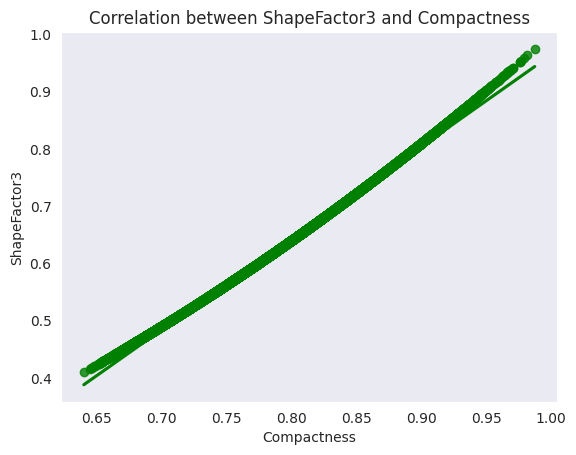

In [ ]:
plt.figure()
sns.regplot(data = df , x = "Compactness" , y = "ShapeFactor3" , color = "g")
plt.title("Correlation between ShapeFactor3 and Compactness")
plt.show()

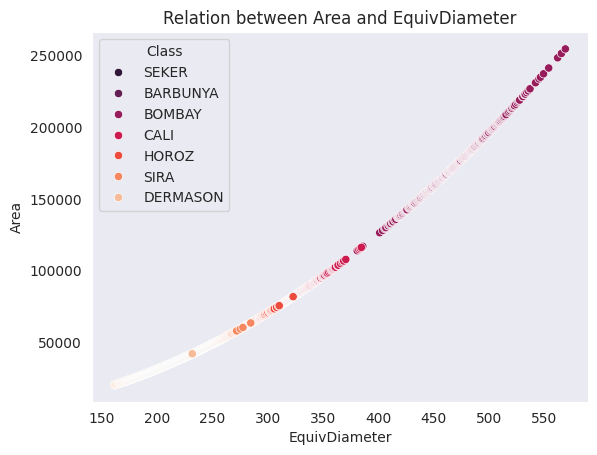

In [ ]:
plt.figure()
sns.set_style("dark")
sns.scatterplot(data = df , x = "EquivDiameter" , y = "Area" , hue = "Class" , palette = 'rocket')
plt.title("Relation between Area and EquivDiameter")
plt.show()

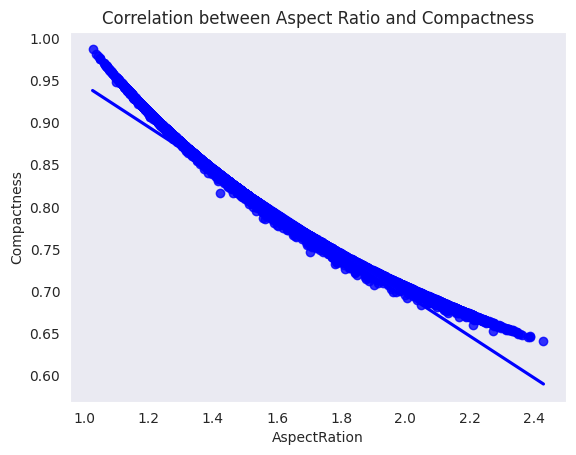

In [ ]:
plt.figure()
sns.regplot(data = df , x = "AspectRation" , y = "Compactness" , color = "b")
plt.title("Correlation between Aspect Ratio and Compactness")
plt.show()

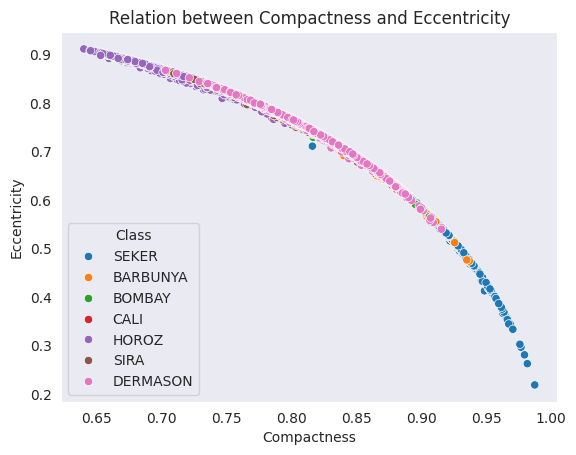

In [ ]:
plt.figure()
sns.scatterplot(data = df , x = "Compactness" , y = "Eccentricity" , hue = "Class")
plt.title("Relation between Compactness and Eccentricity")
plt.show()

In [ ]:
# Based on these observations and keeping threshold at => 0.95 or -0.95.

df.drop(["Perimeter" , "MinorAxisLength" , "ConvexArea" , "EquivDiameter" , "ShapeFactor3" , "Compactness"] , axis = 1 , inplace = True)

In [ ]:
# LabelEncoding Target Variable
df_copy = df.copy()

le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])

df.tail()

# 0 -- Barbunya
# 1 -- Bombay
# 2 -- Cali
# 3 -- Dermason
# 4 -- Horoz
# 5 -- Seker
# 6 -- Sira

Area  MajorAxisLength  AspectRation  Eccentricity    Extent  Solidity  \
13606  42097       288.721612      1.552728      0.765002  0.714574  0.990331   
13607  42101       281.576392      1.476439      0.735702  0.799943  0.990752   
13608  42139       281.539928      1.472582      0.734065  0.729932  0.989899   
13609  42147       283.382636      1.489326      0.741055  0.705389  0.987813   
13610  42159       295.142741      1.619841      0.786693  0.788962  0.989648   

       roundness  ShapeFactor1  ShapeFactor2  ShapeFactor4  Class  
13606   0.916603      0.006858      0.001749      0.998385      3  
13607   0.922015      0.006688      0.001886      0.998219      3  
13608   0.918424      0.006681      0.001888      0.996767      3  
13609   0.907906      0.006724      0.001852      0.995222      3  
13610   0.888380      0.007001      0.001640      0.998180      3

In [ ]:
# Checking correlation with target variable

df.corrwith(df["Class"])

Area              -0.475413
MajorAxisLength   -0.456515
AspectRation      -0.119588
Eccentricity      -0.202824
Extent            -0.030855
Solidity           0.323356
roundness          0.388505
ShapeFactor1       0.391842
ShapeFactor2       0.337656
ShapeFactor4       0.167118
Class              1.000000
dtype: float64

In [ ]:
# Dropping Variable due to low correlation

df.drop("Extent" , axis = 1 , inplace = True)

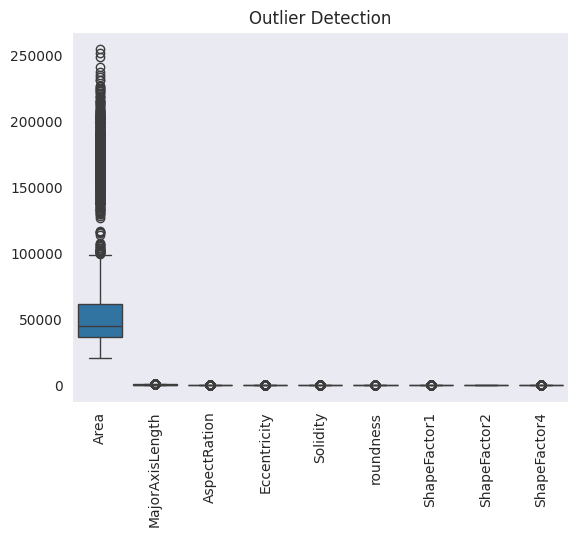

In [ ]:
# Outlier Detection

plt.figure()
sns.boxplot(df.drop(["Class"] , axis = 1))
plt.title("Outlier Detection")
plt.xticks(rotation = 90)
plt.show()

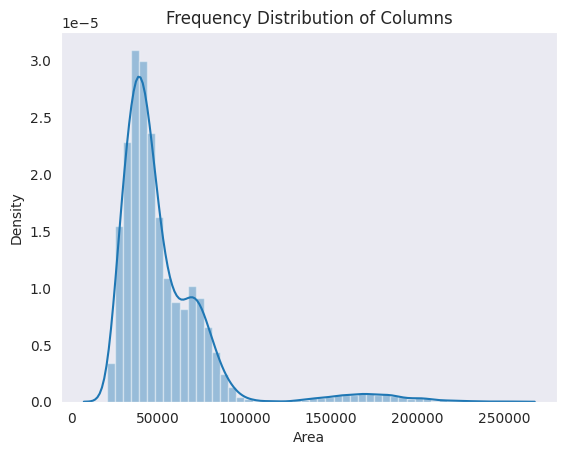

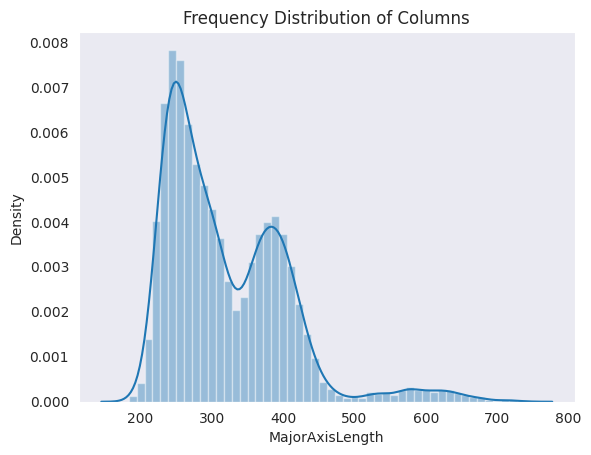

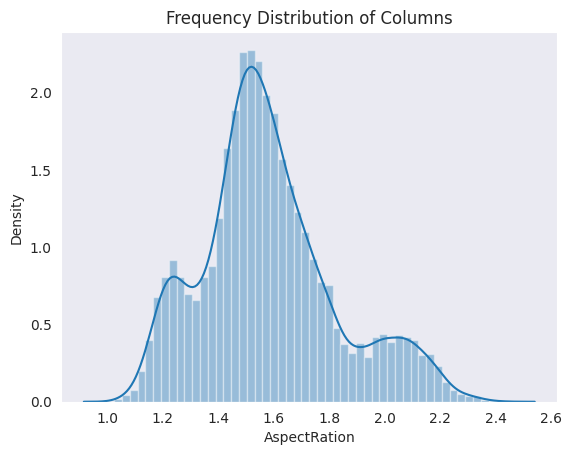

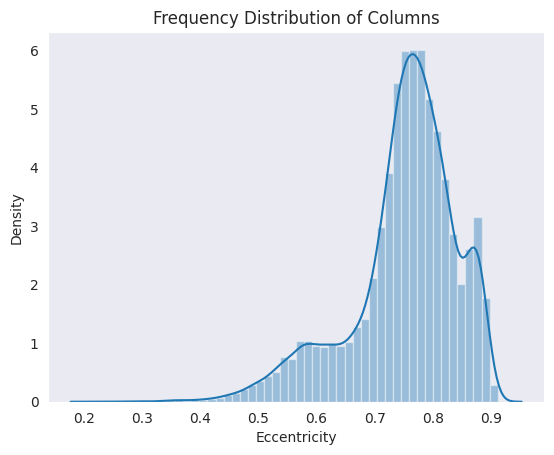

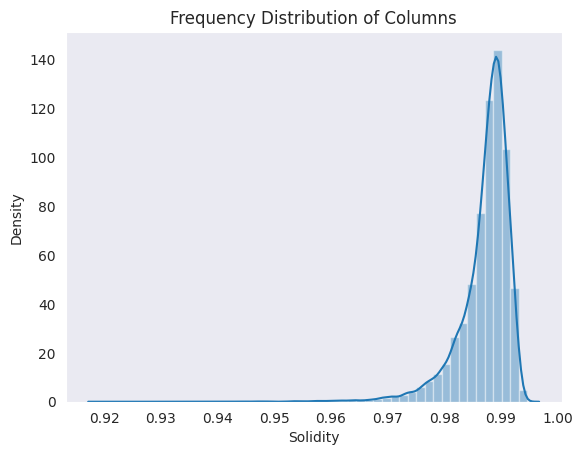

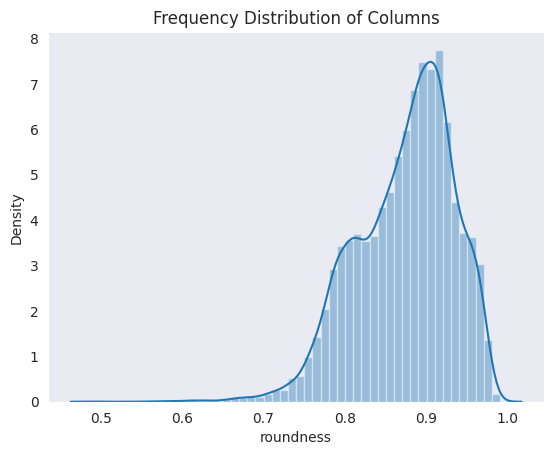

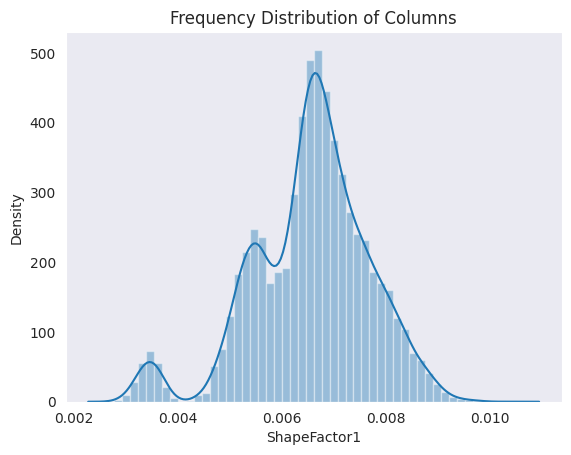

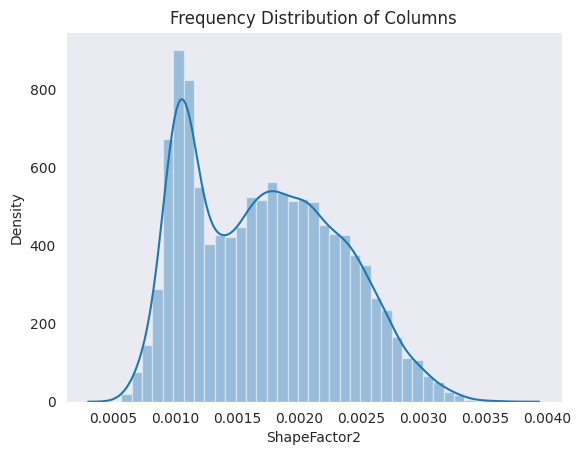

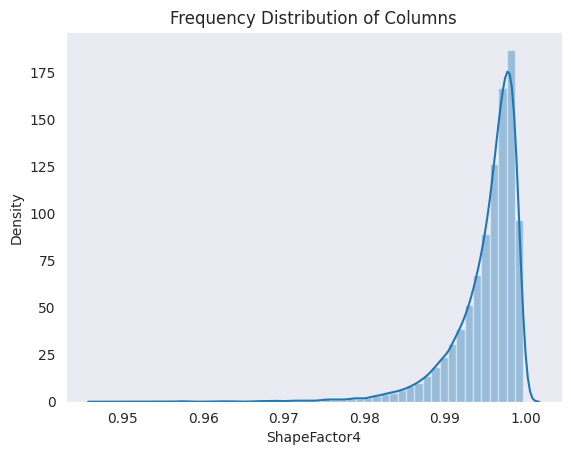

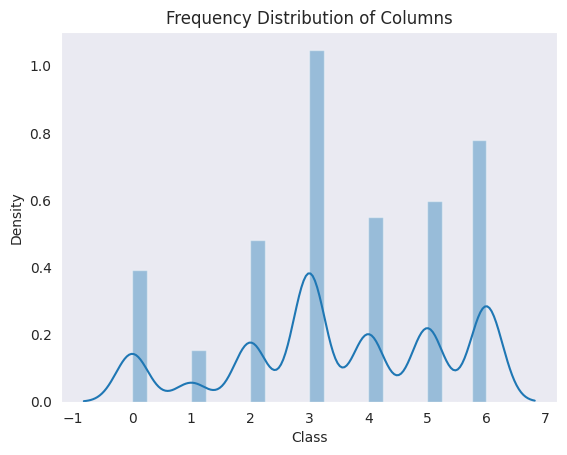

In [ ]:
# Plotting Distribution

for col in df.columns:
  plt.figure()
  sns.distplot(df[col])
  plt.title("Frequency Distribution of Columns")
  plt.show()

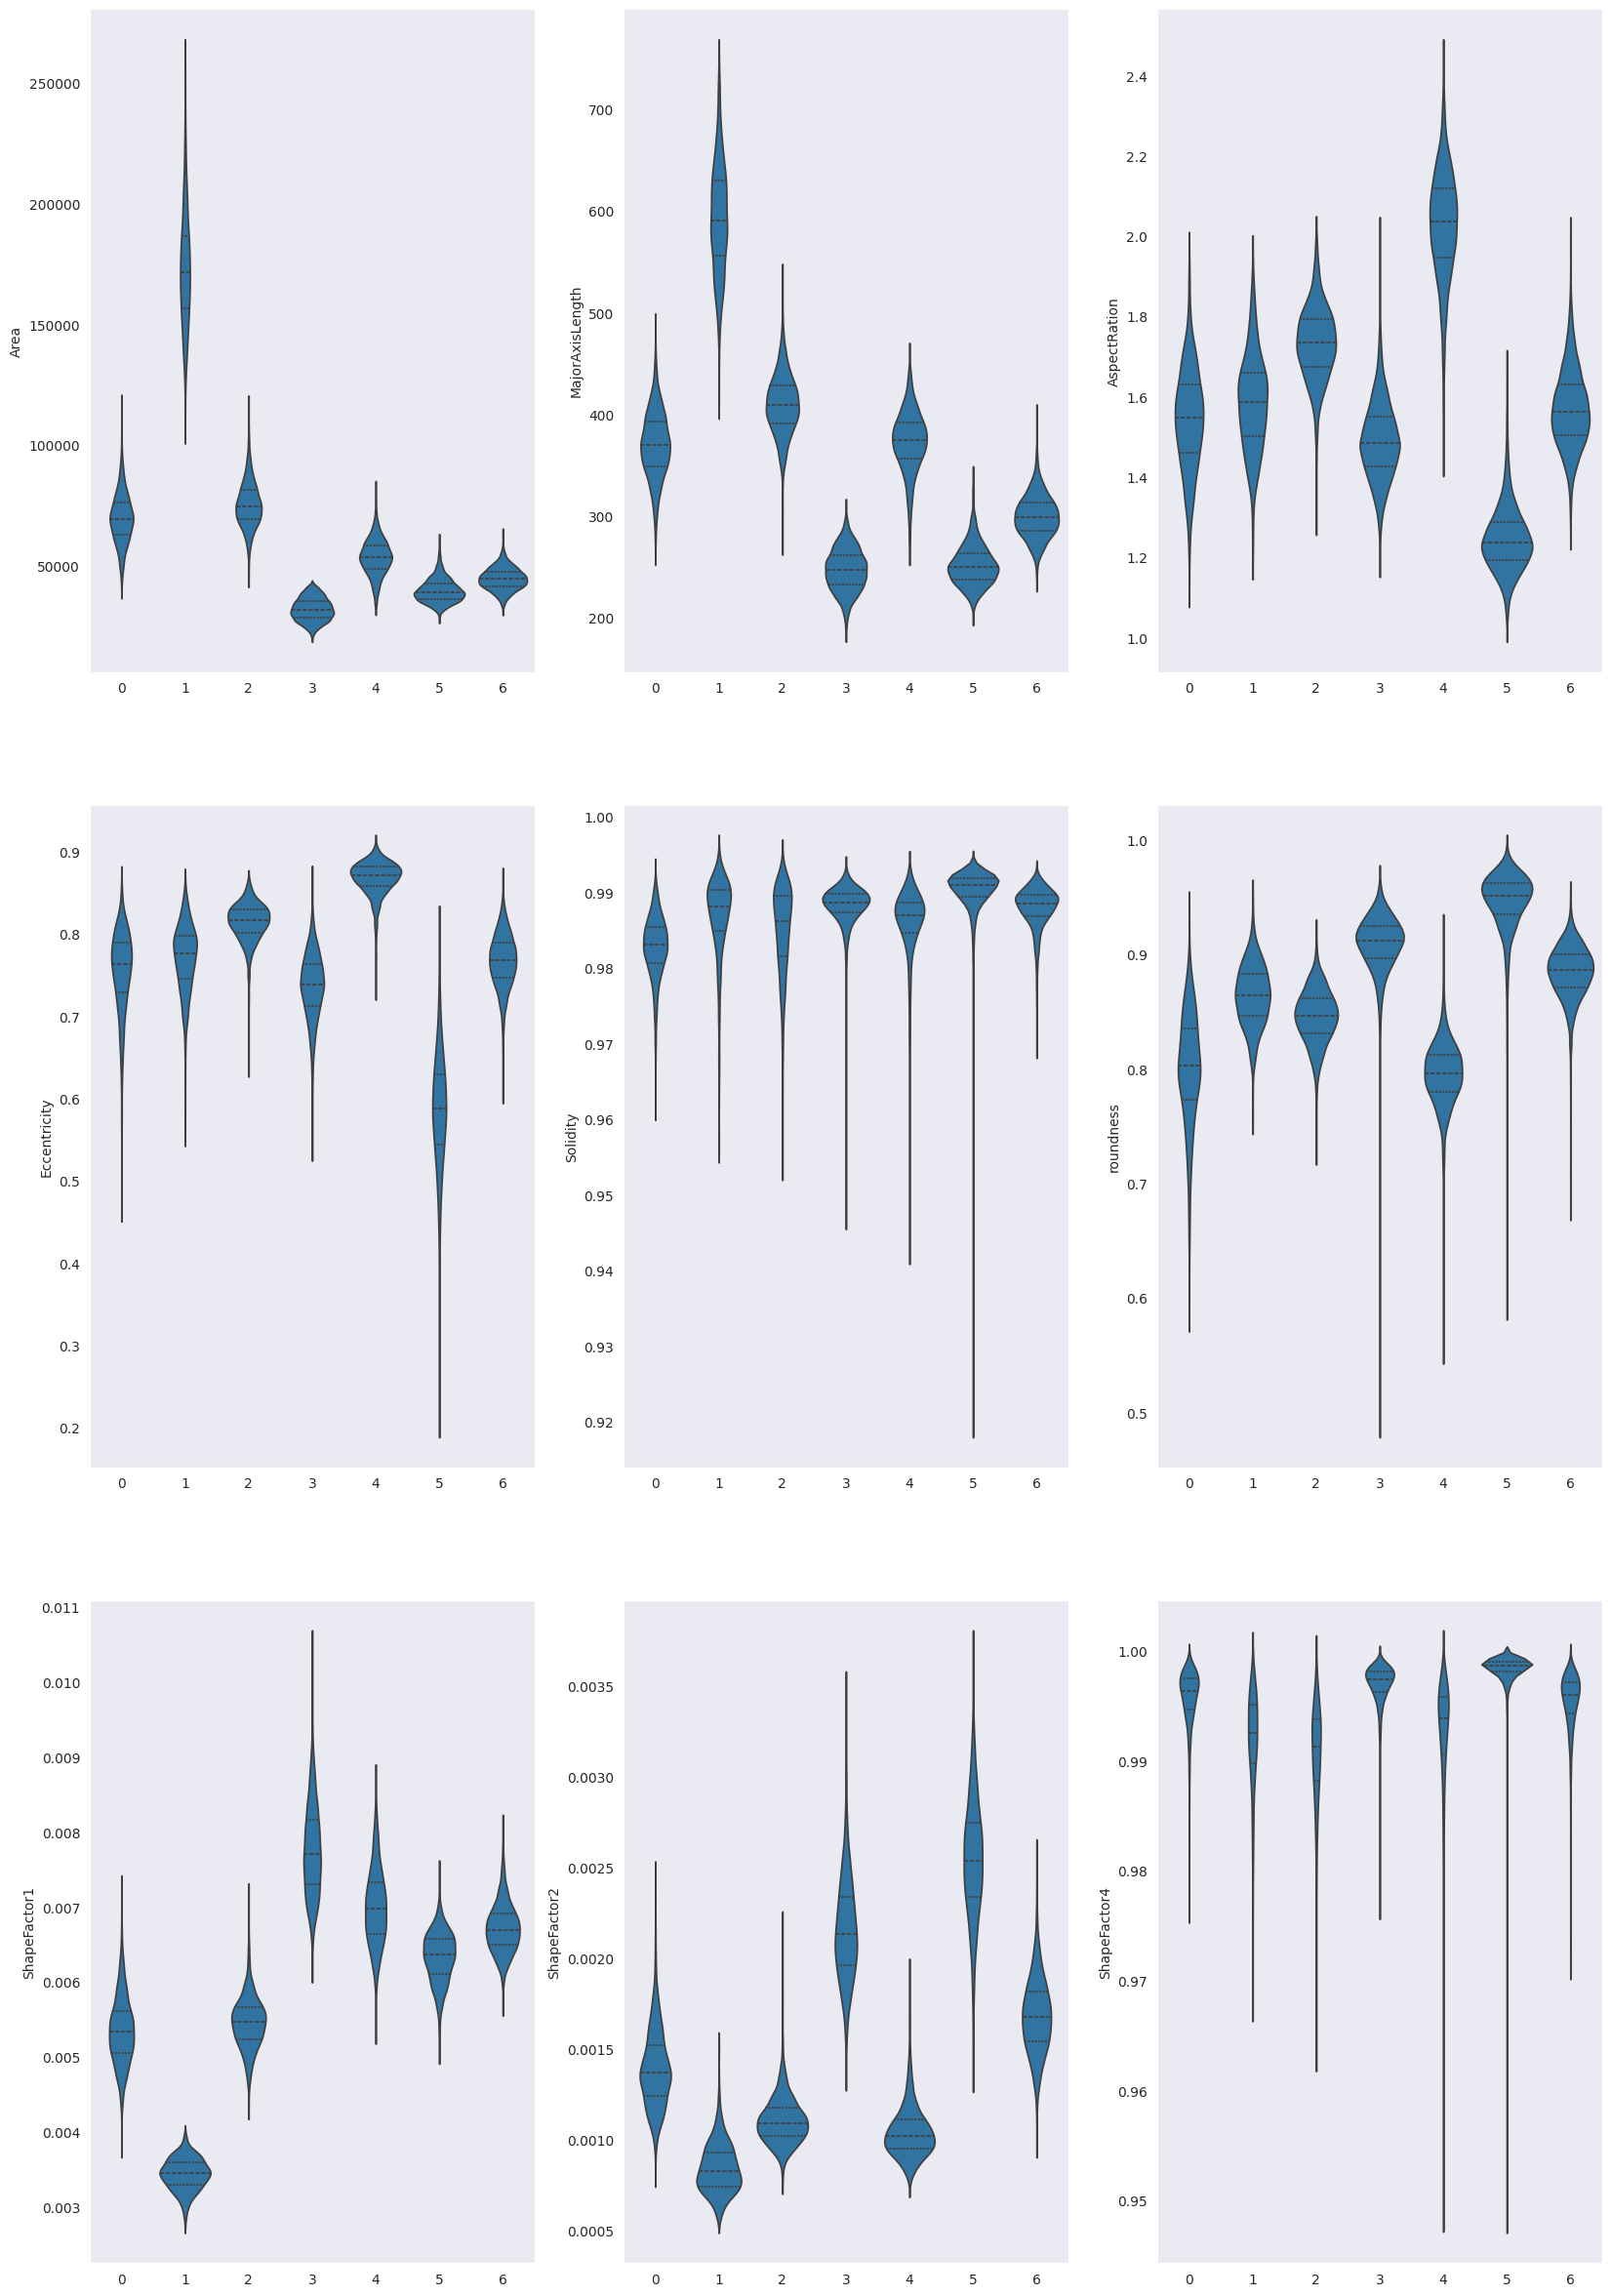

In [ ]:
# Plotting Distribution with reference to Class

fig, axes = plt.subplots(3, 3, figsize = (20, 30))
for feature, ax in zip(df.columns, axes.flatten()):
    sns.violinplot(data=df,x="Class",y=feature,inner="quartile",ax=ax)
    ax.set(xlabel=None)
plt.show()

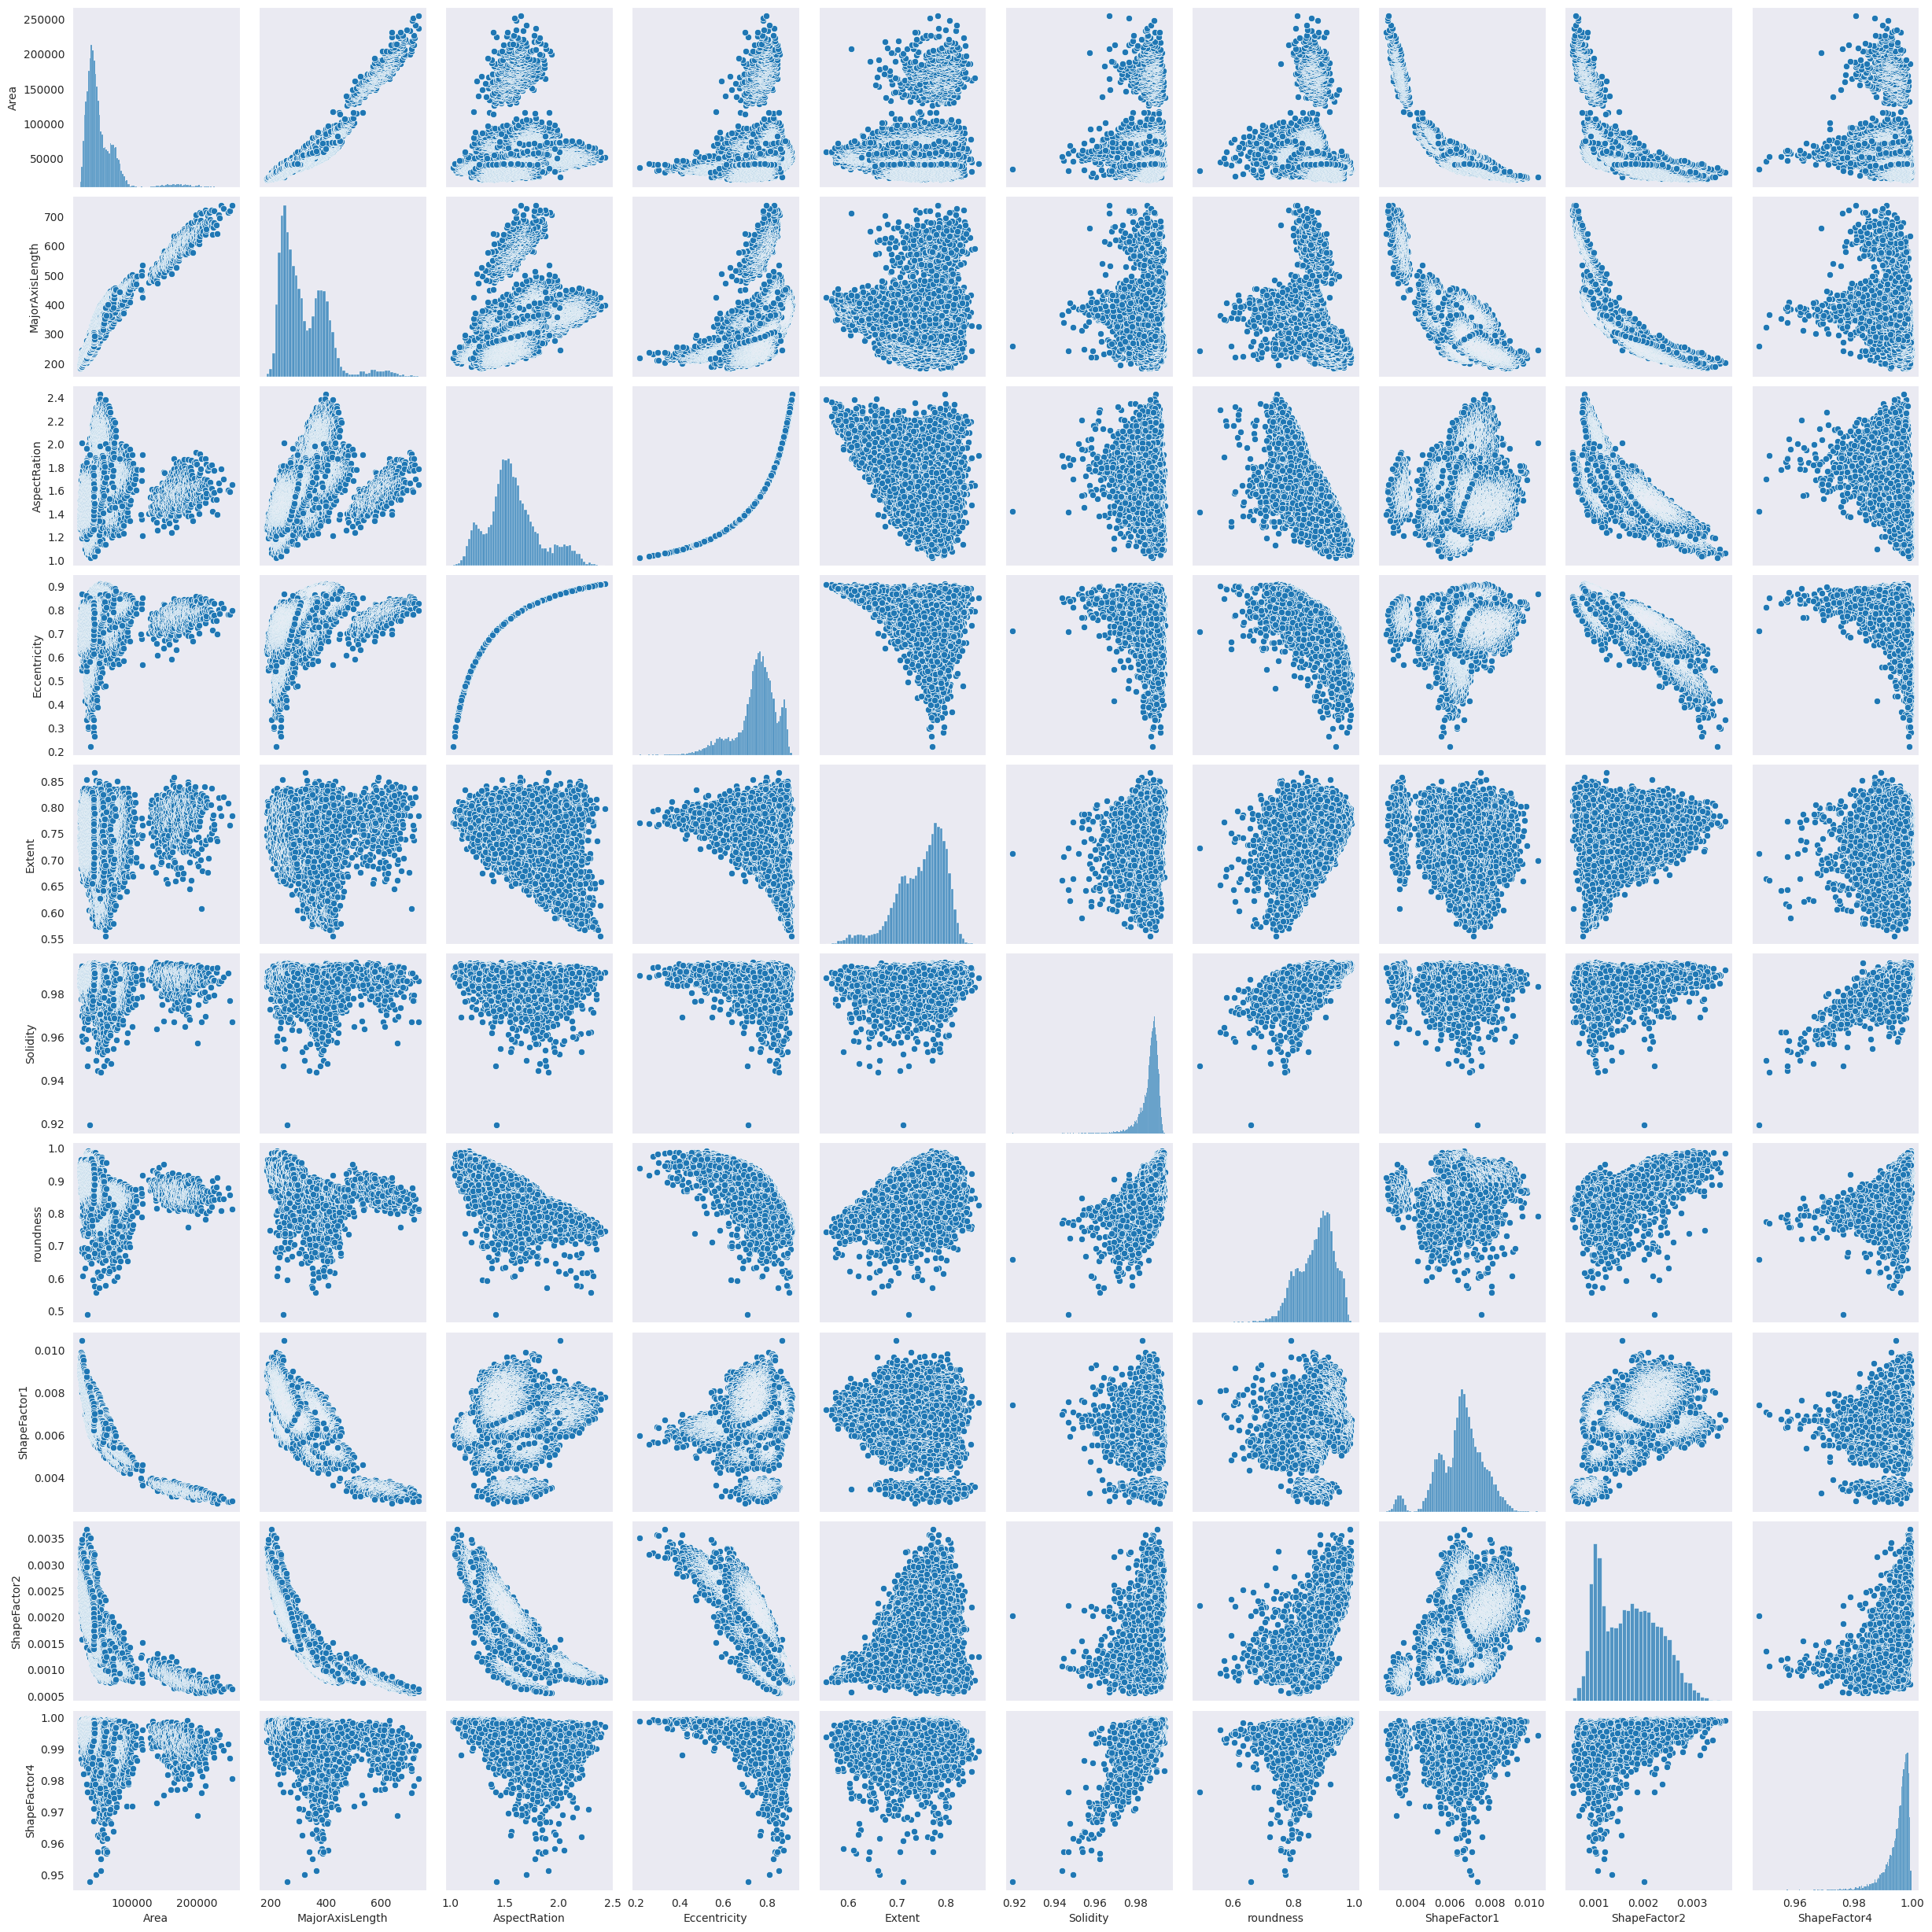

In [ ]:
# Plotting Multiple Correlations

sns.pairplot(df_copy)

In [ ]:
y = df["Class"]
df.drop("Class" , axis = 1 , inplace = True)
x = df

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [ ]:
ss = StandardScaler()

xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

In [ ]:
mod1 = DecisionTreeClassifier()

mod1.fit(xtrain , ytrain)

DecisionTreeClassifier()

The Accuracy Score:  0.8859357696566998


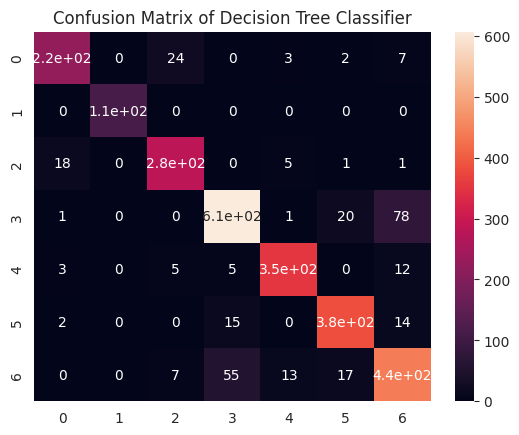

In [ ]:
pred1 = mod1.predict(xtest)

print("The Accuracy Score: " , accuracy_score( ytest, pred1))

plt.figure()
sns.heatmap(confusion_matrix(ytest , pred1) , annot = True)
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

In [ ]:
mod2 = RandomForestClassifier()

mod2.fit(xtrain , ytrain)

RandomForestClassifier()

The Accuracy Score:  0.9235880398671097


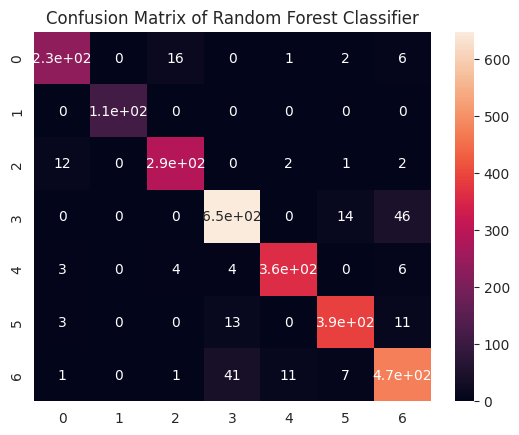

In [ ]:
pred2 = mod2.predict(xtest)

print("The Accuracy Score: " , accuracy_score( ytest, pred2))

plt.figure()
sns.heatmap(confusion_matrix(ytest , pred2) , annot = True)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.show()

In [ ]:
mod3 = SVC()

mod3.fit(xtrain , ytrain)

SVC()

The Accuracy Score:  0.9283868586194167


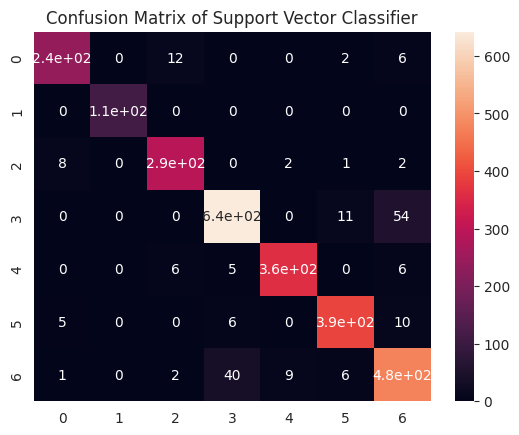

In [ ]:
pred3 = mod3.predict(xtest)

print("The Accuracy Score: " , accuracy_score( ytest, pred3))

plt.figure()
sns.heatmap(confusion_matrix(ytest , pred3) , annot = True)
plt.title("Confusion Matrix of Support Vector Classifier")
plt.show()